# Creating a Conway's Game of Life

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970.


## Rules

The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead, (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:


1. Any live cell with two or three live neighbours survives.
2. Any dead cell with three live neighbours becomes a live cell.
3. All other live cells die in the next generation. Similarly, all other dead cells stay dead.

## Implementing cells

To implement cells, you don't need to apply many changes from the previous example.

In [ ]:
from typing import Dict
from gsf.dynamic_system.dynamic_systems import DiscreteEventDynamicSystem
from gsf.models.models import DiscreteTimeModel


class Cell(DiscreteTimeModel):
    """Cell of the Conway's Game of life

    It has an state alive or dead. When receives an input, changes its by the defined rules.
    Its output is the state.

    Attributes:
      _symbol (str): Symbol that represents the cell when it is printed in console.
    """
    _symbol: str

    def __init__(self, dynamic_system: DiscreteEventDynamicSystem, state: bool, symbol: str = None):
        """
        Args:
            dynamic_system (DiscreteEventDynamicSystem): Automata Grid where the cell belongs.
            state (bool); State that indicates whether the cell is alive (True) or dead (False).
            symbol (str): Symbol that represents the cell when it is printed in console.
        """
        super().__init__(dynamic_system, state=state)
        self._symbol = symbol or "\u2665"

    def _state_transition(self, state: bool, inputs: Dict[str, bool]) -> bool:
        """
        Receives an input and changes the state of the cell.
        Args:
            state (bool); Current state of the cell.
            inputs: A dictionary where the key is the input source cell and the value the output of that cell.

        Returns:
            The new state of the cell.
        """
        values = inputs.values()
        count_alive = 0
        for is_alive in values:
            if is_alive:
                count_alive = count_alive + 1
        return (not state and count_alive == 3) or (state and 2 <= count_alive <= 3)

    def _output_function(self, state: bool) -> bool:
        """
        Returns the state of the cell.
        """
        return state

    def __str__(self):
        """Prints the cell with the defined symbol"""
        is_alive = self.get_state()
        if is_alive:
            return self._symbol
        else:
            return "-"

The difference is in the state transition, where instead of having only one input, it can have up to eight neighbors.

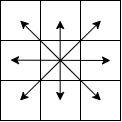

For each neighbor adds one to the counter if it is alive. Then apply the suviving rules.

## Implementing the automata

The model is also similar to the previous one, changing the way in which neighbors are assigned.

In [ ]:
from __future__ import annotations
from random import random, seed
from typing import List, TYPE_CHECKING

from gsf.dynamic_system.dynamic_systems import DiscreteEventDynamicSystem

if TYPE_CHECKING:
    from gsf.dynamic_system.core.base_dynamic_sytem import DynamicSystemOutput


class Board(DiscreteEventDynamicSystem):
    """Game of life

    It has a group of cells, connected between them. The output of each cell is its right neighbor.
    Attributes:
        _cells (List[List[Cell]]): Group of cells of the board automata.
    """
    _cells: List[List[Cell]]

    def __init__(self, width: int, height: int, random_seed: int = 42):
        super().__init__()
        seed(random_seed)
        self._create_cells(width, height)
        self._define_relations(width, height)

    def _create_cells(self, width: int, height: int):
        """Appends the cells to the automata.
        Args:
            width (int): Number of column cells of the automata.
            height (int): Number of row cells of the automata.
        """
        self._cells = []
        for i in range(height):
            row = []
            for j in range(width):
                row.append(Cell(self, random() < 0.5))
            self._cells.append(row)

    def _define_relations(self, width: int, height: int):
        """Creates the connections between the left cell and the right cell.
        Args:
            width (int): Number of column cells of the automata.
            height (int): Number of row cells of the automata.
        """
        for i in range(height):
            for j in range(width):
                for x in range(max(0, i - 1), min(i + 2, height)):
                    for y in range(max(0, j - 1), min(j + 2, width)):
                        if x != i or y != j:
                            self._cells[i][j].add(self._cells[x][y])

    def __str__(self):
        """Changes the format to show the board automata when is printed"""
        s = ""
        for row in self._cells:
            for cell in row:
                s += str(cell)
            s += "\n"
        return s

    def get_output(self) -> DynamicSystemOutput:
        """Prints the model every generation"""
        print(self)
        return super().get_output()

We overwrite the `get_output` member, because we want to print the board every generation.

## Running the simulation

Create the experiment and assign the dynamic system.

In [ ]:
from gsf.experiments.experiment_builders import DiscreteEventExperiment

board = Board(10, 10)
experiment = DiscreteEventExperiment(board)
print(board)
experiment.simulation_control.start(stop_time=10)
experiment.simulation_control.wait()
print(board)

-♥♥♥---♥♥♥
♥-♥♥--♥--♥
--♥♥-♥♥♥--
----♥-----
-♥♥♥♥♥♥♥-♥
♥♥♥---♥-♥♥
------♥♥♥♥
♥--♥-♥-♥♥♥
-♥--♥♥--♥♥
♥--♥♥♥----

-♥♥♥---♥♥♥
♥-♥♥--♥--♥
--♥♥-♥♥♥--
----♥-----
-♥♥♥♥♥♥♥-♥
♥♥♥---♥-♥♥
------♥♥♥♥
♥--♥-♥-♥♥♥
-♥--♥♥--♥♥
♥--♥♥♥----

-♥-♥---♥♥♥
-----♥---♥
-♥♥--♥♥♥--
-♥------♥-
♥---♥-♥♥-♥
♥---♥-----
♥-♥--♥----
-----♥----
♥♥♥----♥-♥
---♥-♥----

--------♥♥
-♥--♥♥---♥
-♥♥--♥♥♥♥-
♥♥♥-----♥-
♥♥---♥-♥♥-
♥--♥♥-♥---
-♥--♥♥----
♥-♥---♥---
-♥♥-♥-♥---
-♥♥-------

--------♥♥
-♥♥-♥♥---♥
---♥♥♥♥♥♥♥
-----♥---♥
---♥♥♥♥♥♥-
♥-♥♥--♥♥--
♥♥♥-♥-♥---
♥-♥-♥-♥---
♥----♥----
-♥♥♥------

--------♥♥
--♥-------
--♥♥---♥-♥
---------♥
--♥♥----♥-
♥-------♥-
♥---♥-♥---
♥-♥-♥-♥---
♥---♥♥----
-♥♥-------

----------
--♥♥-----♥
--♥♥----♥-
---------♥
--------♥♥
-♥-♥---♥--
♥--♥---♥--
♥---♥-♥---
♥-♥-♥♥----
-♥--------

----------
--♥♥------
--♥♥----♥♥
---------♥
--------♥♥
--♥----♥--
♥♥♥♥♥-♥♥--
♥---♥-♥---
♥--♥♥♥----
-♥--------

----------
--♥♥------
--♥♥----♥♥
----------
--------♥♥
--♥---♥♥--
♥-♥-♥-♥♥--
♥-----♥♥--
♥♥-♥♥♥----
----♥-----

-